<a href="https://colab.research.google.com/github/venky-347/covid_variant_analysis/blob/main/covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv("/content/covid-variants.csv")

In [20]:
df.head(5)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [21]:
df.tail(5)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6
100415,Zimbabwe,2021-11-01,non_who,0,0.0,6


In [22]:
df.dtypes

location                object
date                    object
variant                 object
num_sequences            int64
perc_sequences         float64
num_sequences_total      int64
dtype: object

In [23]:
df.shape

(100416, 6)

In [24]:
duplicate_df=df[df.duplicated()]
print("number of duplicate rows :",duplicate_df.shape)

number of duplicate rows : (0, 6)


In [25]:
df.count()

location               100416
date                   100416
variant                100416
num_sequences          100416
perc_sequences         100416
num_sequences_total    100416
dtype: int64

In [26]:
df=df.drop_duplicates()
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [27]:
df.count()

location               100416
date                   100416
variant                100416
num_sequences          100416
perc_sequences         100416
num_sequences_total    100416
dtype: int64

In [28]:
print(df.isnull().sum())

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64


In [29]:
df=df.dropna()
df.count()

location               100416
date                   100416
variant                100416
num_sequences          100416
perc_sequences         100416
num_sequences_total    100416
dtype: int64

In [30]:
print(df.isnull().sum())

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64


In [31]:
df.head(5)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [32]:
df.dtypes

location                object
date                    object
variant                 object
num_sequences            int64
perc_sequences         float64
num_sequences_total      int64
dtype: object

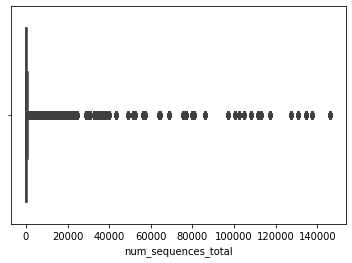

In [36]:
sns.boxplot(x=df["num_sequences_total"])

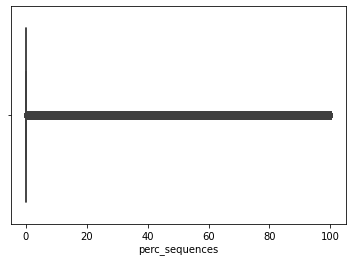

In [37]:
sns.boxplot(x=df["perc_sequences"])

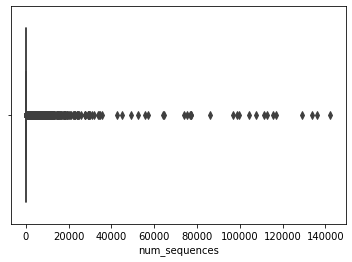

In [38]:
sns.boxplot(x=df["num_sequences"])

In [39]:
df.shape

(100416, 6)

In [40]:
df.dtypes

location                object
date                    object
variant                 object
num_sequences            int64
perc_sequences         float64
num_sequences_total      int64
dtype: object

Text(0.5, 0, 'variant types')

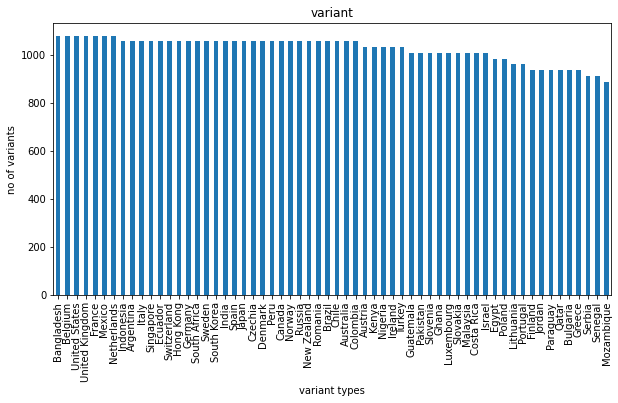

In [45]:
df.location.value_counts().nlargest(60).plot(kind='bar',figsize=(10,5))
plt.title("variant")
plt.ylabel("no of variants")
plt.xlabel("variant types")

Text(0.5, 0, 'variant types')

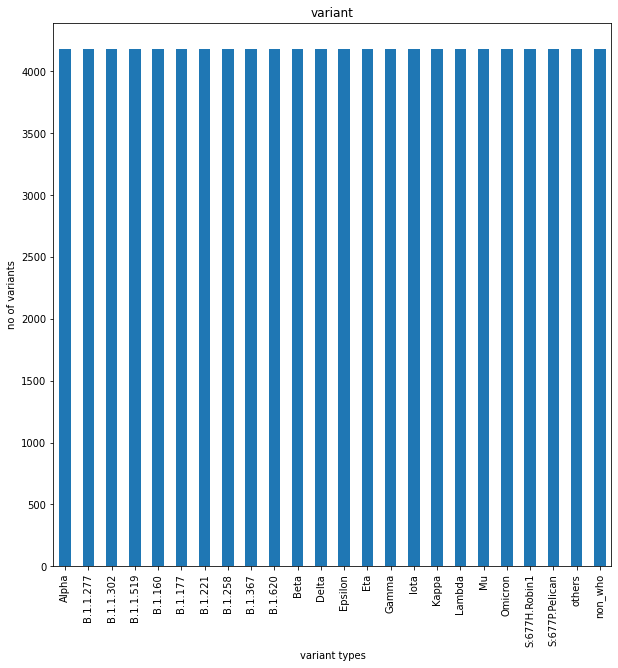

In [47]:
df.variant.value_counts().nlargest(60).plot(kind='bar',figsize=(10,10))
plt.title("variant")
plt.ylabel("no of variants")
plt.xlabel("variant types")

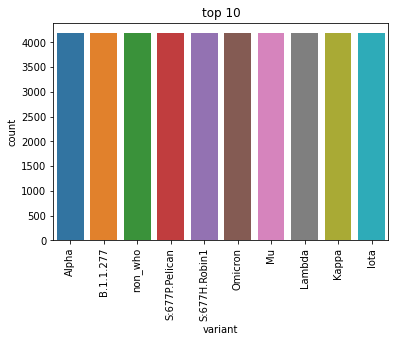

In [49]:
top_ten=df.groupby("variant").size().sort_values(ascending=False).head(10)
top_ten_df=pd.DataFrame(top_ten.reset_index(name="count"))
plt.title("top 10")
plt.ylabel("no of variants")
plt.xticks(rotation=90)
sns.barplot(x='variant',y='count',data=top_ten_df)

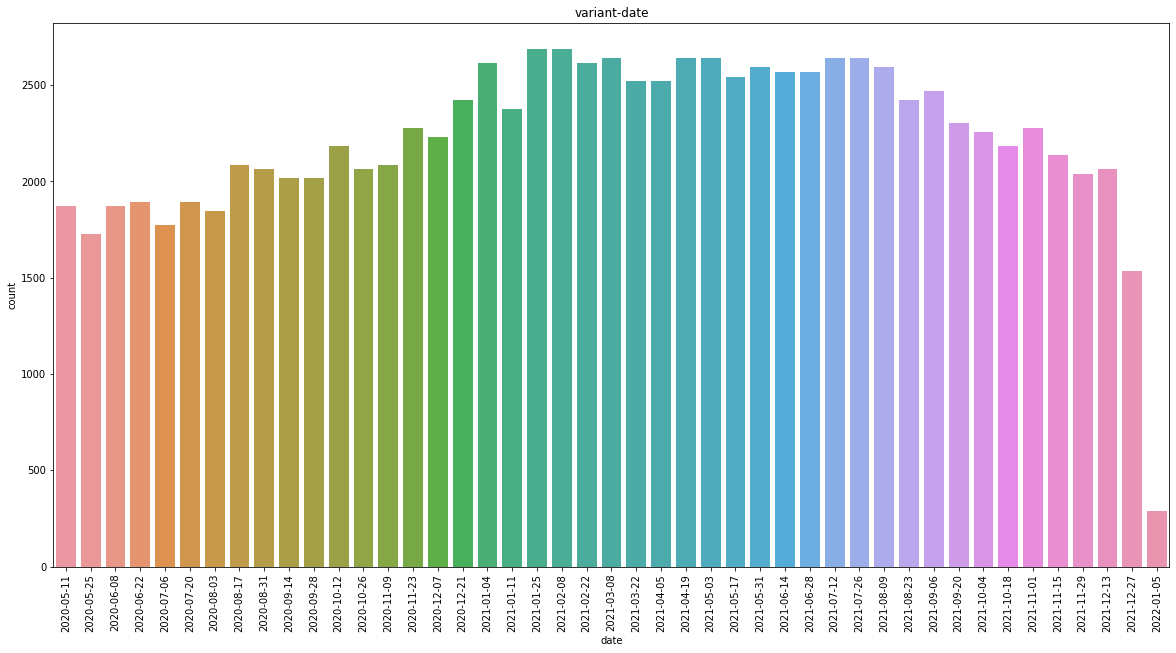

In [57]:
plt.figure(figsize=(20,10))
variant_df=pd.DataFrame(df.groupby("date").size().reset_index(name="count"))
plt.title("variant-date")
plt.xticks(rotation=90)
sns.barplot(x="date",y="count",data=variant_df)

25-1-2021 and 08-02-2021 more cases

In [58]:
df.dtypes

location                object
date                    object
variant                 object
num_sequences            int64
perc_sequences         float64
num_sequences_total      int64
dtype: object

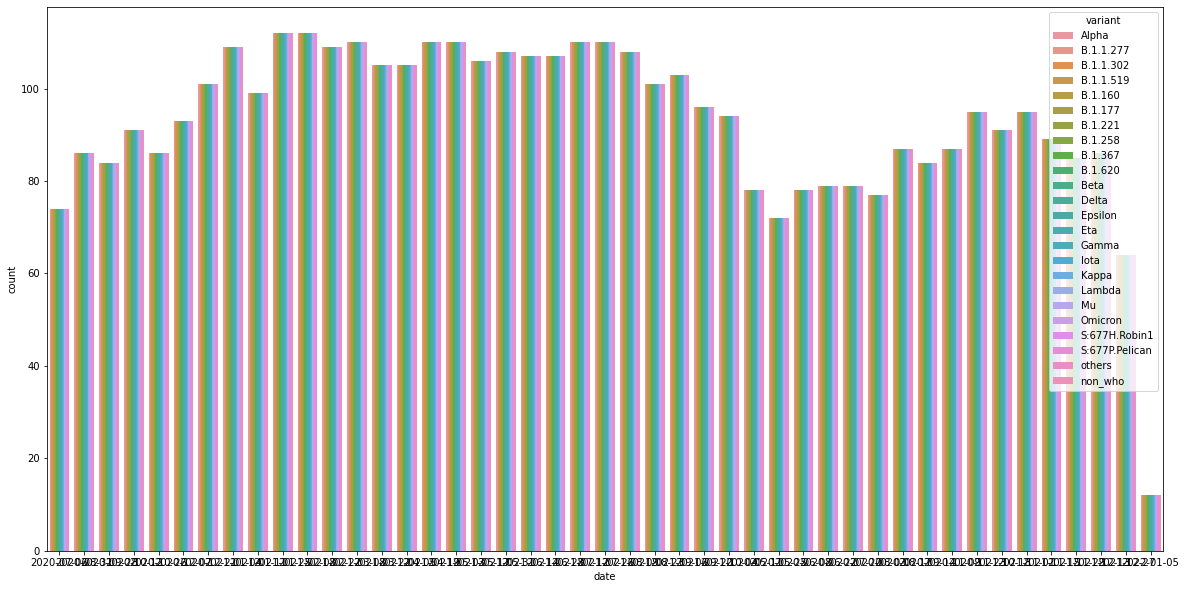

In [74]:
plt.figure(figsize=(20,10))
sns.countplot(x="date",data=df,hue="variant")

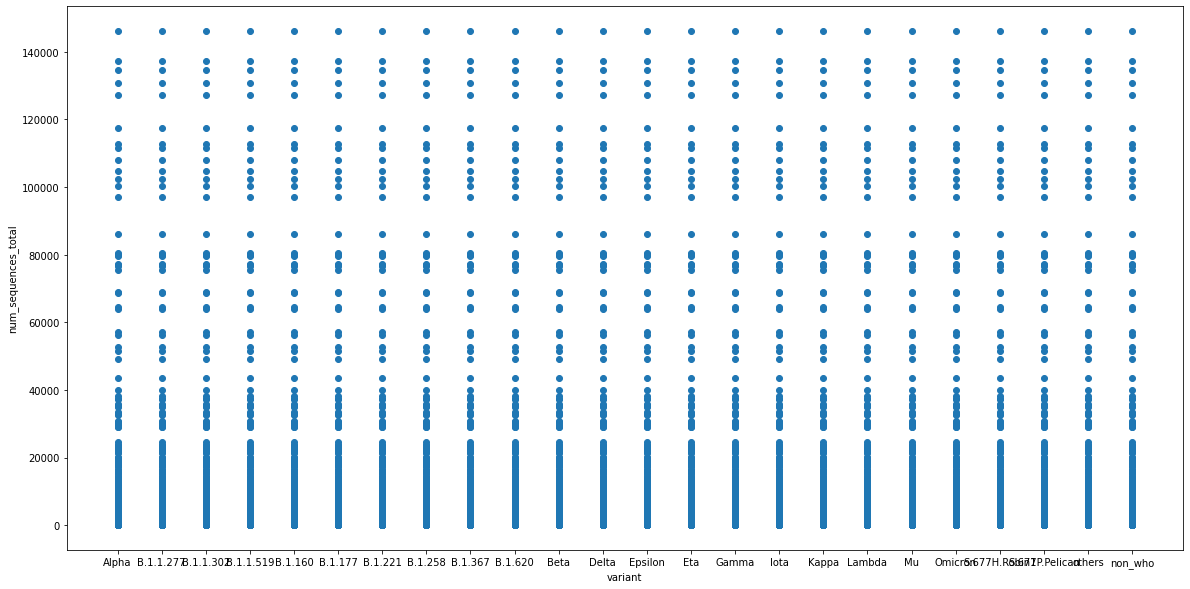

In [75]:
fig,ax=plt.subplots(figsize=(20,10))
ax.scatter(df['variant'],df['num_sequences_total'])
ax.set_xlabel('variant')
ax.set_ylabel('num_sequences_total')
plt.show()

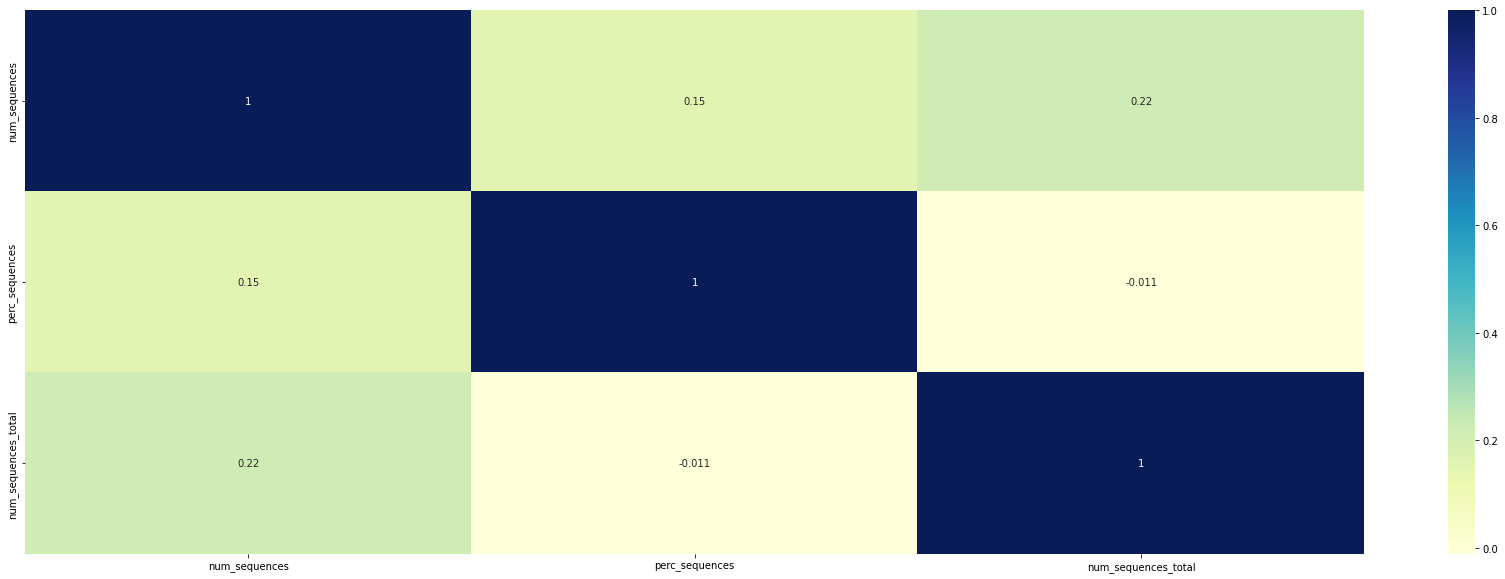

In [91]:
plt.figure(figsize=(30,10))
c=df.corr()
sns.heatmap(c,cmap="YlGnBu",annot=True)

In [92]:
df.dtypes

location                object
date                    object
variant                 object
num_sequences            int64
perc_sequences         float64
num_sequences_total      int64
dtype: object

In [93]:
df.head(5)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [94]:
df.count()

location               100416
date                   100416
variant                100416
num_sequences          100416
perc_sequences         100416
num_sequences_total    100416
dtype: int64

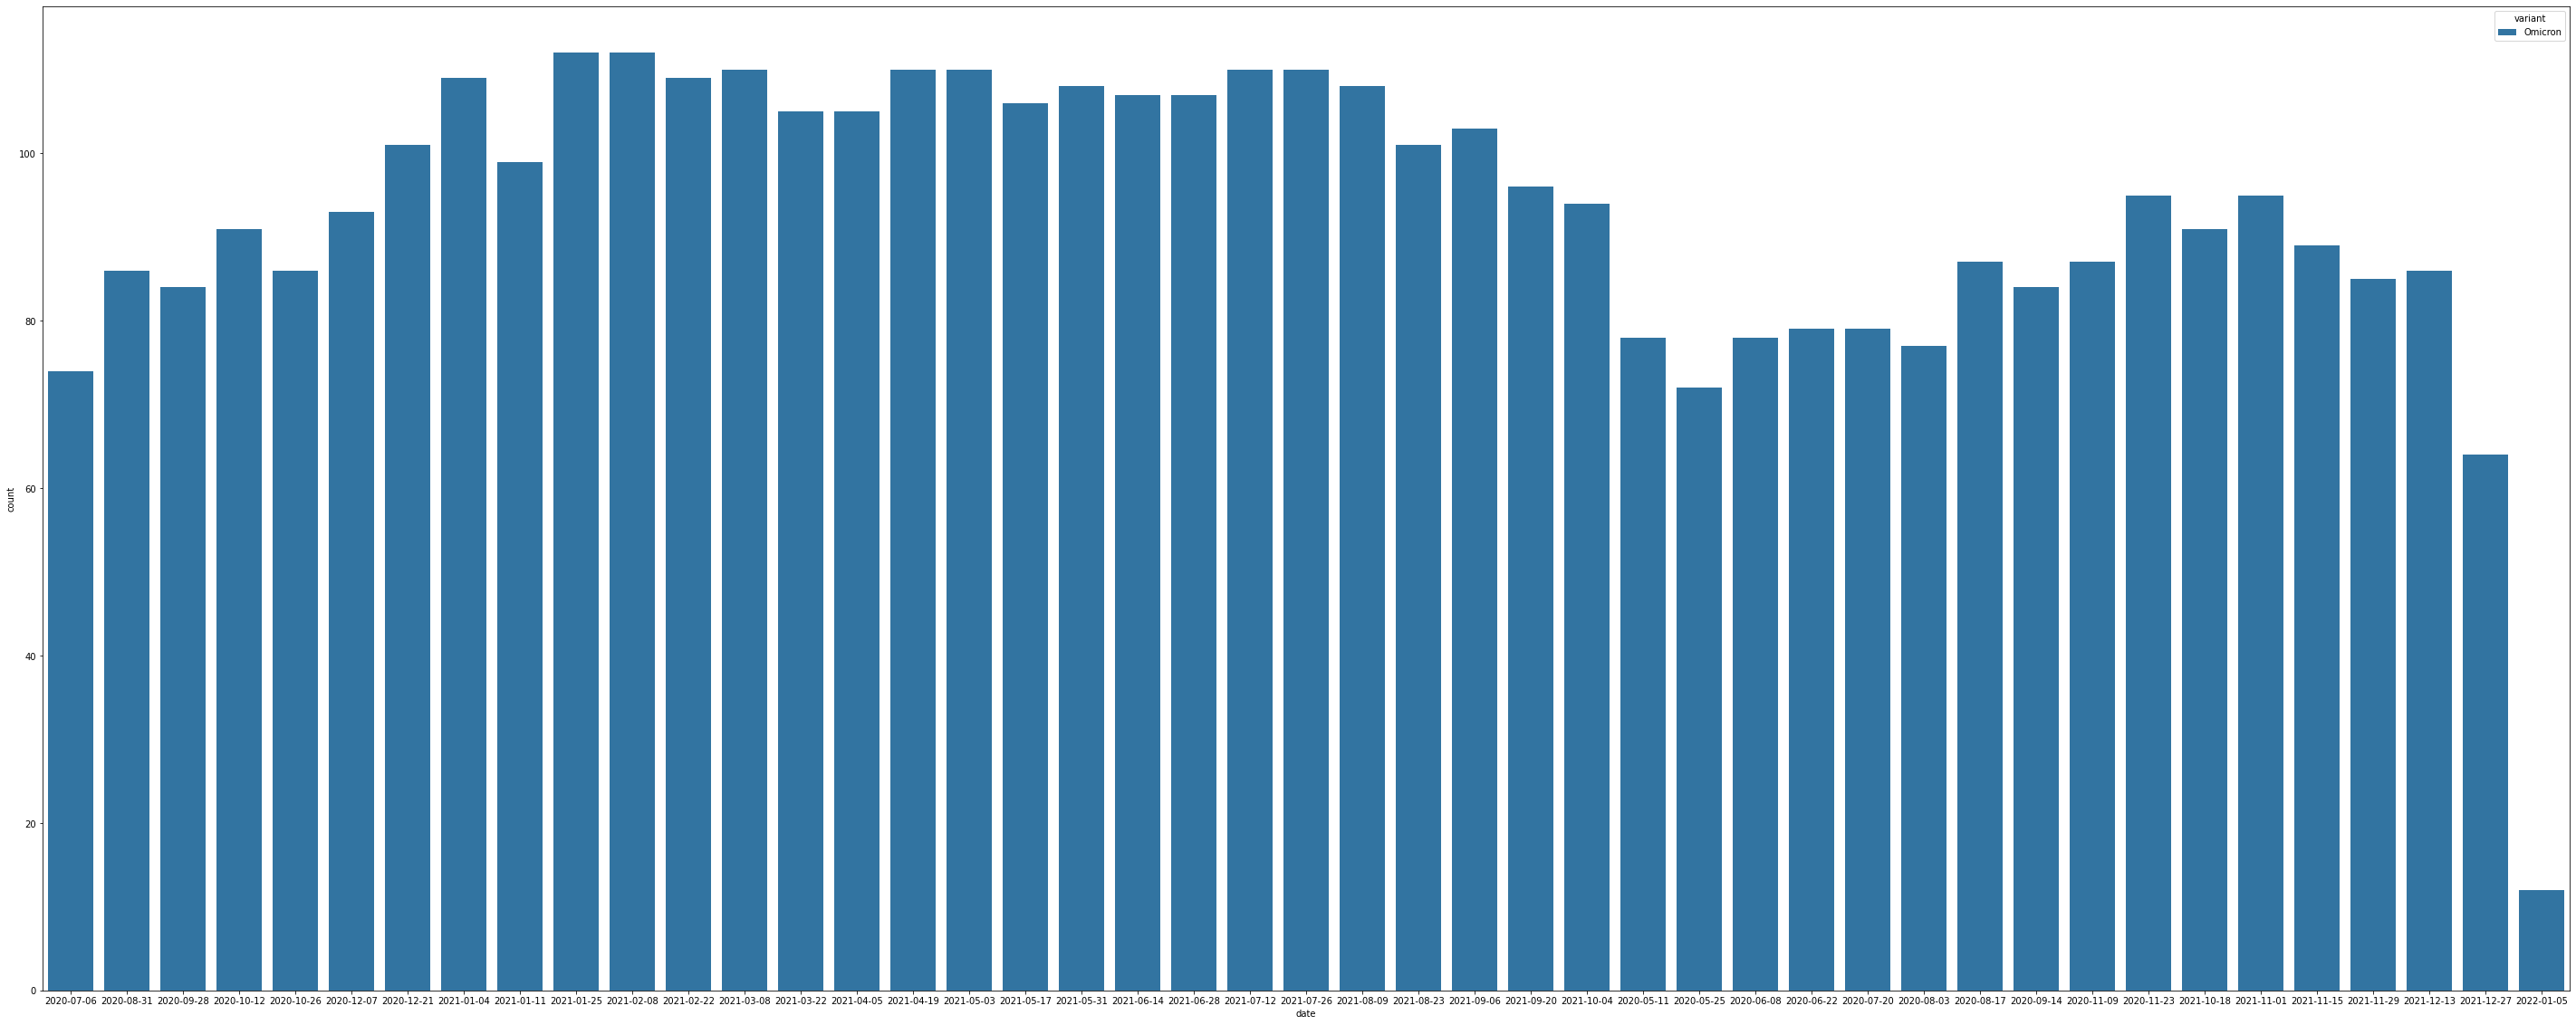

In [106]:
plt.figure(figsize=(50,20))
variant_in_df=df[df["variant"].str.contains('Omicron')].copy()
ax=sns.countplot(x="date",hue="variant",data=variant_in_df)

In [120]:
df.dtypes

location                object
date                    object
variant                 object
num_sequences            int64
perc_sequences         float64
num_sequences_total      int64
dtype: object

In [ ]:
pp_df=df[['variant','num_sequences_total']].sort_values('num_sequences_total')
pc_df=pp_df.drop_duplicates()
pp_df.plot(kind="bar",x="variant",figsize=(30,15))